In [1]:
from harness import Harness
import pandas
from harness.ext import HarnessExtension

In [2]:


class NetworkXMixin:
    graph = None

class NetworkXExtension(HarnessExtension):
    imports = 'networkx'
    mixin = NetworkXMixin
    
    def keywords(self, dataframe):
        return {
            'G': lambda: dataframe.graph,
            'df': lambda: dataframe,
        }
    
    def to_graph(self, source, target, edge_attr=True, df=None):
        df.graph = self.module_.from_pandas_dataframe(
            df, source, target, edge_attr
        )
        return df.graph
    
    def callback(self, dataframe, value):
        if isinstance(value, self.module_.Graph):
            return dataframe
        return value
    
    def edges(self, df):
        return df.graph.edges()
    
    def nodes(self, df):
        return df.graph.nodes()
        

In [3]:
extensions = [
    'harness.ext.base.JinjaExtension',
    'harness.ext.SciKit.SciKitExtension', 
    'harness.ext.Bokeh.BokehModelsExtension',     
    'harness.ext.Bokeh.BokehPlottingExtension',
    'harness.ext.Bokeh.BokehChartsExtension',
    '__main__.NetworkXExtension'
]

In [4]:
df = Harness(pandas.np.random.randn(10,2), extensions=extensions)

In [5]:
df.to_graph(source=0, target=1)

,0,1
0,-0.869805,-0.437204
1,0.062956,0.537731
2,0.574194,0.139849
3,-0.785910,-1.038586
4,2.836383,1.231714
5,-0.763236,-0.075892
6,0.261005,0.778646
7,-0.418760,0.216434
8,0.614215,-0.328891
9,-1.762953,-0.898531


In [6]:
df.to_graph(0, 1).edges()

[(-0.86980501429684631, -0.43720374795013328),
 (2.8363834876428844, 1.231714361927954),
 (0.77864610500810783, 0.26100475652111066),
 (-0.785909825327193, -1.0385864406583951),
 (0.57419432016236327, 0.13984909618144373),
 (0.614215166564821, -0.32889062336016744),
 (0.53773082667176386, 0.062955578967227463),
 (-0.89853108247004831, -1.7629528817850988),
 (0.21643435508675646, -0.41875956157975591),
 (-0.075892289842387106, -0.76323567786914082)]

In [7]:
df.edges()

[(-0.86980501429684631, -0.43720374795013328),
 (2.8363834876428844, 1.231714361927954),
 (0.77864610500810783, 0.26100475652111066),
 (-0.785909825327193, -1.0385864406583951),
 (0.57419432016236327, 0.13984909618144373),
 (0.614215166564821, -0.32889062336016744),
 (0.53773082667176386, 0.062955578967227463),
 (-0.89853108247004831, -1.7629528817850988),
 (0.21643435508675646, -0.41875956157975591),
 (-0.075892289842387106, -0.76323567786914082)]

In [8]:
Harness(df.spring_layout()).transpose().sample(2)

,0,1
-0.075892,0.964444,0.699412
-0.328891,0.612079,0.006051


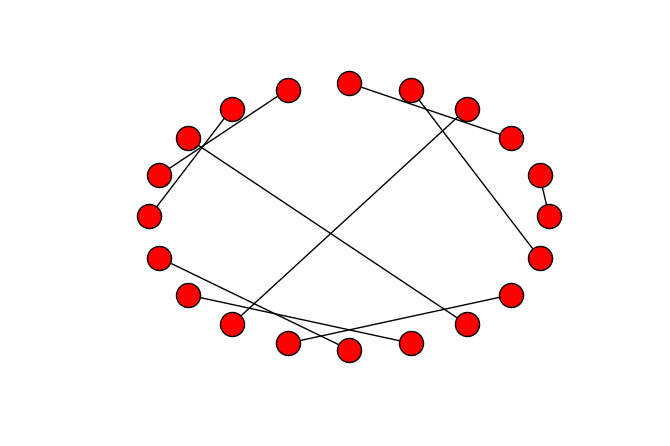

In [9]:
%matplotlib inline
df.draw_circular()